## Calculation of the symmetric active particle speed

The calculation assumes a Gaussian beam of constant beam waist across the particle surface. The beam center is displaced by a distance $\delta x$ from the particle center. The calculations employ the sympy symbolic module. 

In [1]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

#plt.style.use('presentation')
init_printing()

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
x,y,s,v,v0=symbols("x y s v v0")
R=symbols("R")

In [3]:
T=exp(-((R*sin(x)-y)/sqrt(2)/s)**2)

In [4]:
T

In [5]:
DfT=diff(T,x)

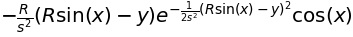

In [6]:
simplify(DfT)

In [7]:
integral=integrate(DfT*cos(x),x)

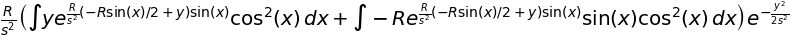

In [8]:
simplify(integral)

In [9]:
# convert the equation into a usable form for numerical calculations
ff=lambdify((x,y,R,s),DfT)

In [18]:
wave = np.arange(1,2,0.1)

In [27]:
yy = 1
-ff(np.arange(-np.pi/2,np.pi/2,0.001),yy,np.arange(1,2,0.1),0.5)*np.cos(np.arange(-np.pi/2,np.pi/2,0.001))

TypeError: only length-1 arrays can be converted to Python scalars

In [21]:
nR=2
ns=0.5

max=[]
maxpos=[]
for nR in wave:
    inte=[]
    ny=np.arange(-5,5,0.01)
    for yy in ny:
        nx=np.arange(-np.pi/2,np.pi/2,0.001)
        nf=-ff(nx,yy,nR,ns)*np.cos(nx)
        inte.append(np.sum(nf[:]*(nx[1]-nx[0])))
    index=np.argmax(inte)
    max.append(ny[index])

TypeError: only length-1 arrays can be converted to Python scalars

In [15]:
nR=1.09
ns=1

inte=[]
ny=arange(-5,5,0.01)
for yy in ny:
    nx=arange(-np.pi/2,np.pi/2,0.001)
    nf=-ff(nx,yy,nR,ns)*np.cos(nx)
    inte.append(np.sum(nf[:]*(nx[1]-nx[0])))

inte1=inte    

NameError: name 'arange' is not defined

In [ ]:
nR=1.09
ns=0.3

inte=[]
ny=arange(-5,5,0.01)
for yy in ny:
    nx=arange(-np.pi/2,np.pi/2,0.001)
    nf=-ff(nx,yy,nR,ns)*np.cos(nx)
    inte.append(np.sum(nf[:]*(nx[1]-nx[0])))

plt.figure(figsize=(10,4.6))
plt.subplot(1,2,1)
plt.plot(ny,inte1,'--')
plt.plot(ny,inte,'k-',lw=2)
plt.xlabel('displacement $\delta x$ [µm]')
plt.ylabel('velocity $v_{th}$ [a.u.]')
plt.grid(linestyle='--',linewidth=0.5)

plt.subplot(1,2,2)

plt.plot(arange(1,2,0.1),max,'ko-')
plt.xlabel('radius R [µm]')
plt.ylabel( '$\delta x(v_{th}^{max})$ [µm]')
plt.grid(linestyle='--',linewidth=0.5)

plt.tight_layout()  
plt.savefig('swimmer_theory.pdf', format='pdf')
plt.show()

In [420]:
v=-v0*x*exp(-x*x/(2*s**2))
#v=sin(0.5*x)*exp(-abs(x))

In [422]:
ep=integrate(1/v,x)

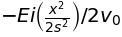

In [423]:
ep

In [424]:
from scipy.special import expi

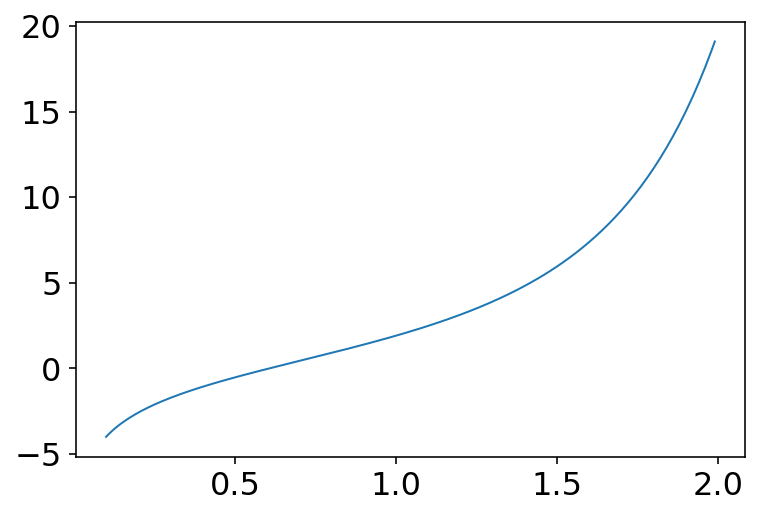

In [426]:
xx=arange(0.1,2,0.01)
plt.plot(xx,expi(xx**2))
plt.plot()
#plt.plot(xx,np.exp(xx/1.3)+np.log(xx))

In [427]:
xx=arange(-5,5,0.01)
def vel(x,vo):
    ss=1
    return(-vo*x*np.exp(-x**2/(2*ss**2)))

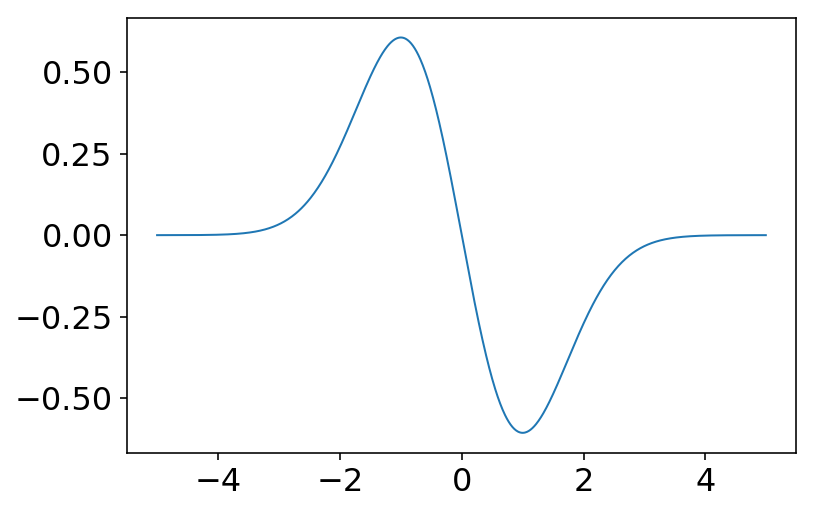

In [428]:
plt.plot(xx,vel(xx,1))

In [429]:
dist=[]
for p in arange(0,5,0.01):
    dx=-1
    for t in arange(0,1,0.01):
        delx=5*vel(dx,p)*0.02
        dx=dx-delx
    dist.append(dx)

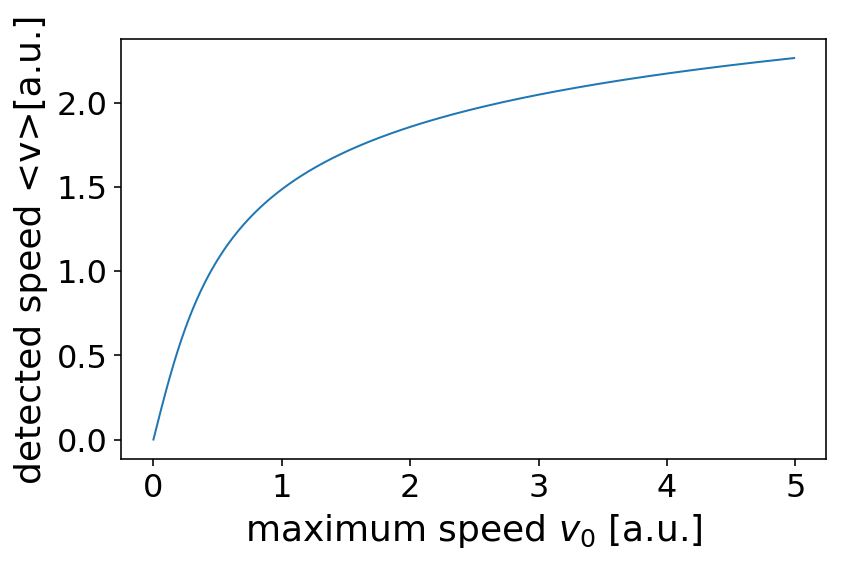

In [454]:
plt.plot(arange(0,5,0.01),-np.array(dist[:])-1)
plt.xlabel('maximum speed $v_{0}$ [a.u.]')
plt.ylabel( 'detected speed <v>[a.u.]')

plt.tight_layout()  
plt.savefig('apparent_velocity.pdf', format='pdf')
plt.show()

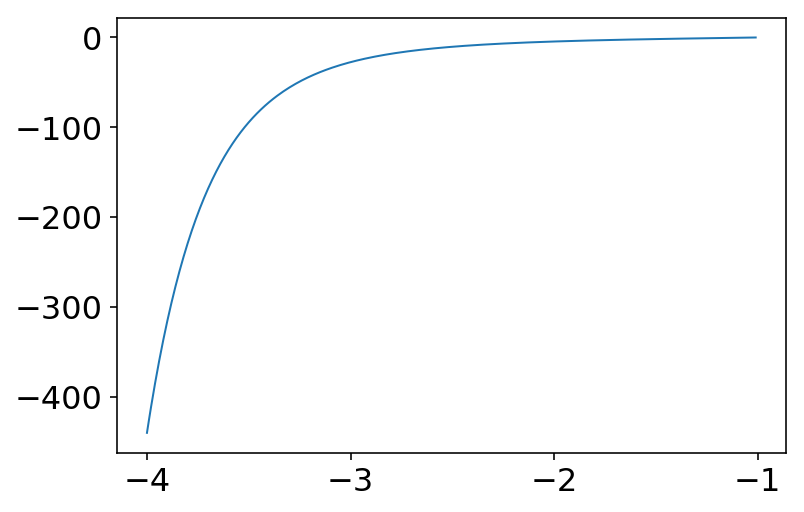

In [374]:
ss=1
xx=arange(-ss-3,-ss,0.01)
plt.plot(xx,-expi(xx**2/(2*ss**2))+expi(0.5))

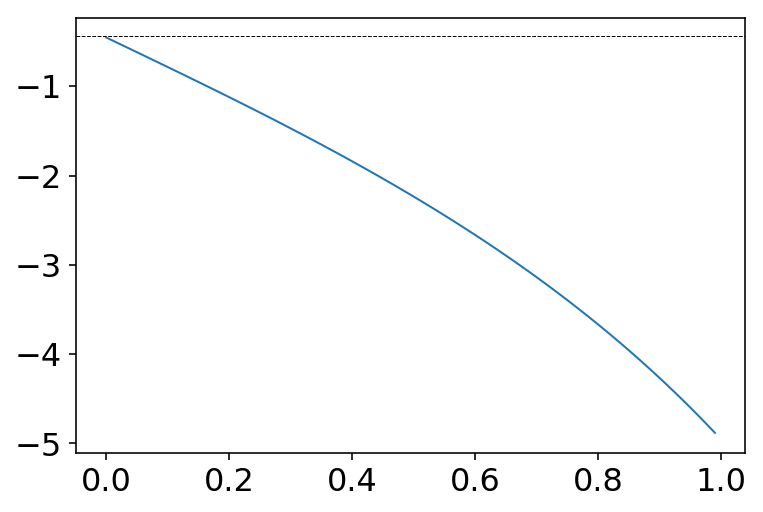

In [449]:
def f(x):
    ss=1
    return(-expi((xx+ss)**2/(2*ss**2)))

xx=arange(0,1,0.01)
vvv=2*arange(0,5,0.1)*0.08-expi(0.5)
plt.plot(xx,f(xx))
plt.axhline(y=vvv[1],linewidth=0.5, color = 'k',linestyle='--')
#plt.plot(vvv)